In [35]:
#Osnat_Blau_318650629
import csv
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv("mobile_price_1.csv")

In [36]:
# Task 1

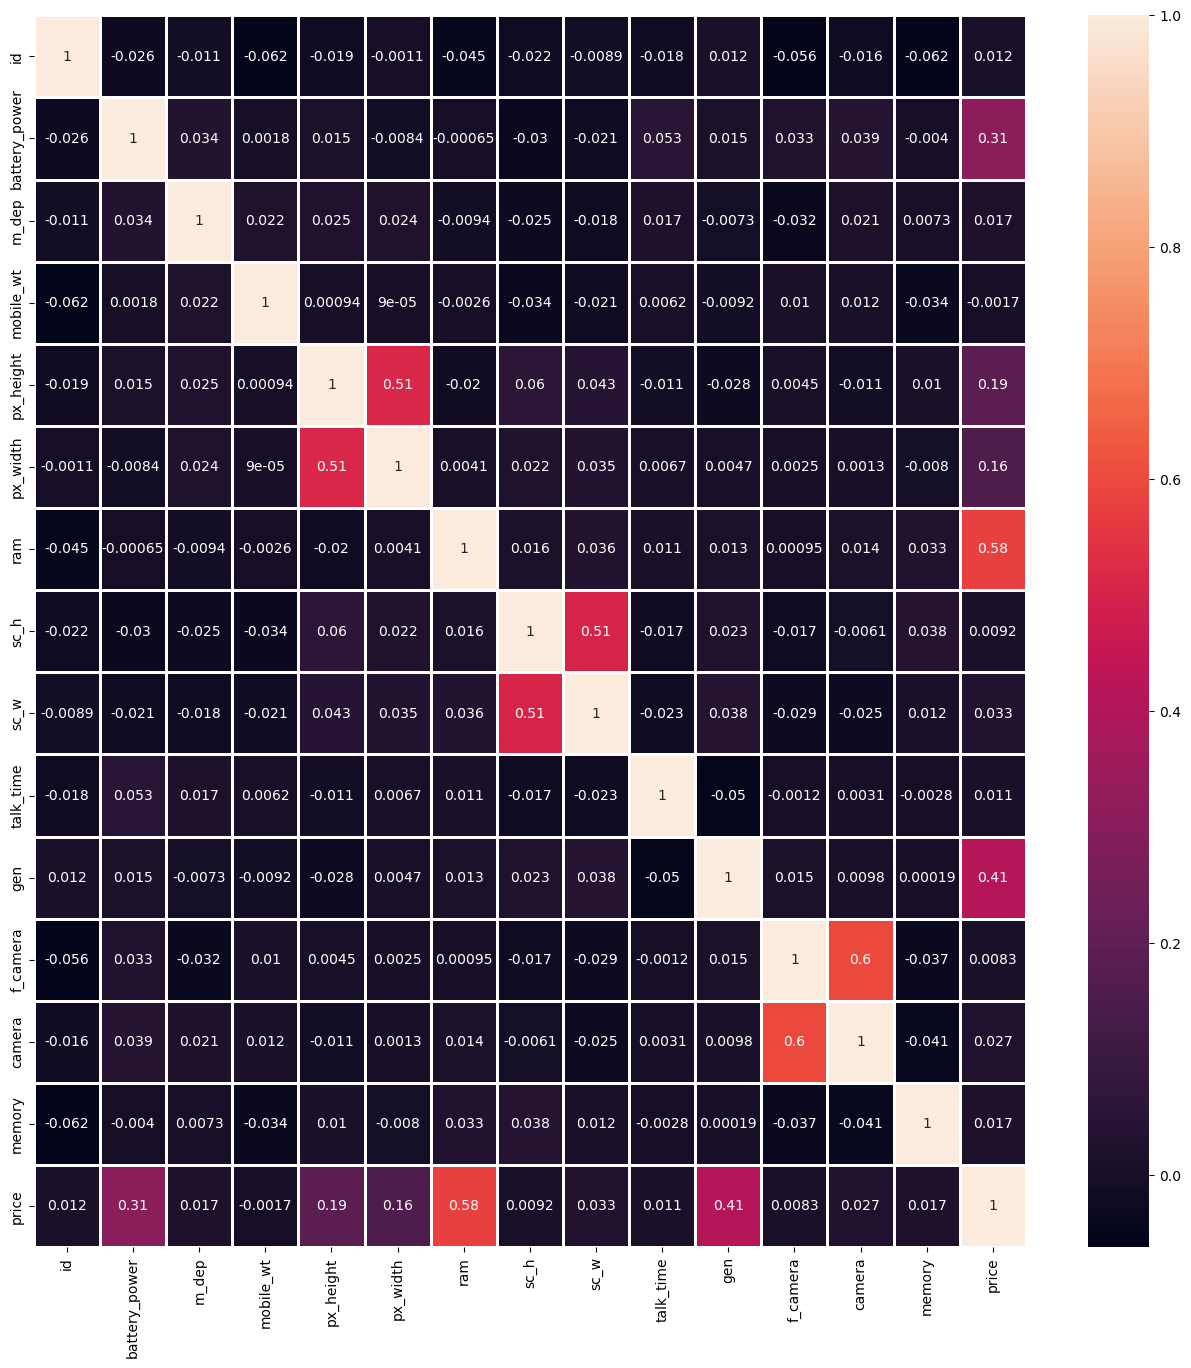

In [37]:
# 1. Plot a correlation heatmap of the data set and include it.
correlation = data.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(correlation, xticklabels=correlation.columns.values, 
            yticklabels=correlation.columns.values, annot=True, linewidths=1)
plt.show()

In [38]:
# 2. Which features would you say are correlated with the device price? 
# battery_power, px_height, px_width, ram and gen.

In [39]:
# 3. Are there features not shown in the correlation matrix that are correlated with the price?
# If so, what are they?
# bluetooth, cores, speed, sim, screen and wifi.

<AxesSubplot:xlabel='gen', ylabel='price'>

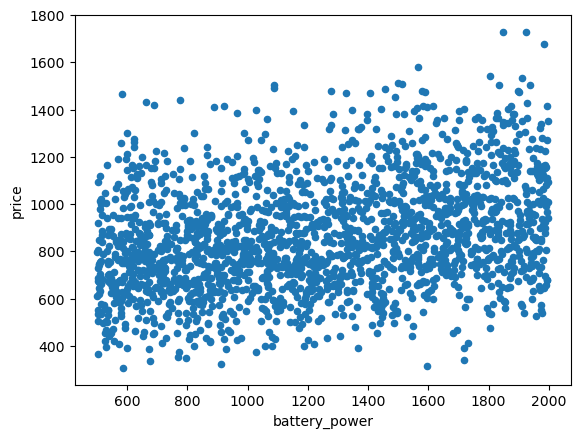

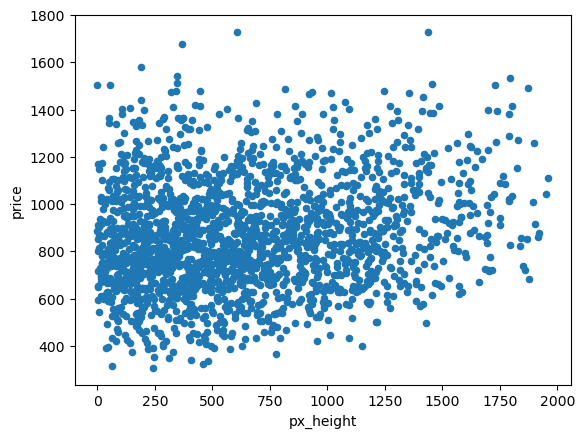

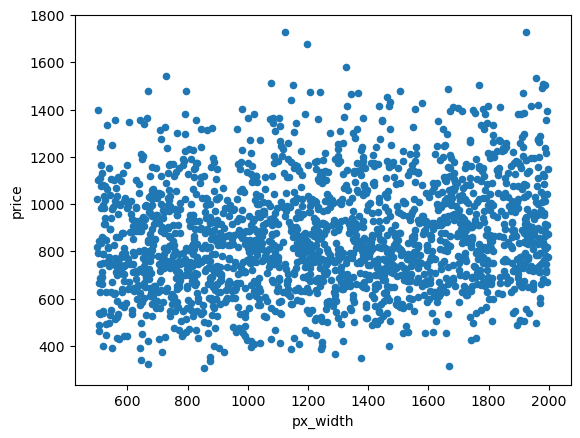

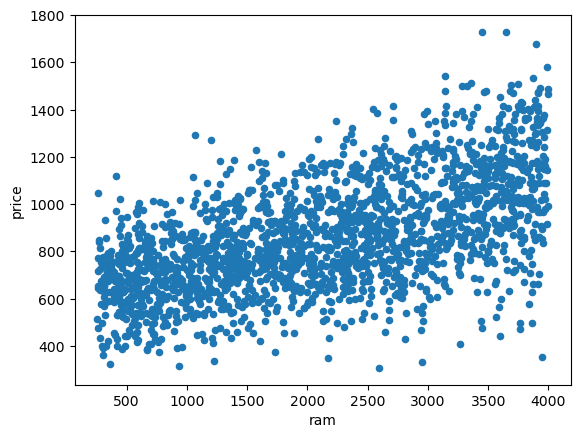

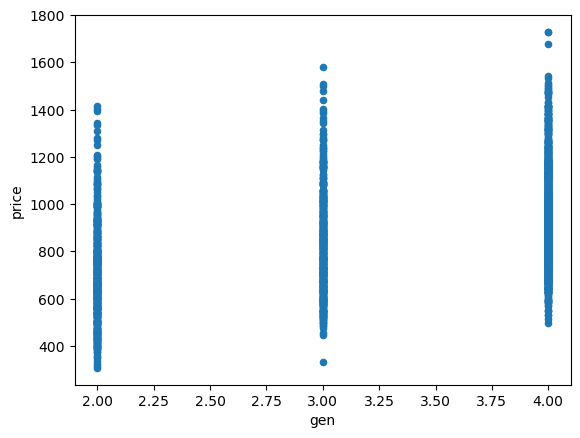

In [40]:
# 4. For each feature correlated with the price, plot its relationship with price. 
# Create a separate plot for each feature you mentioned in question 2. 
data.plot.scatter(x='battery_power', y='price')
data.plot.scatter(x='px_height', y='price')
data.plot.scatter(x='px_width', y='price')
data.plot.scatter(x='ram', y='price')
data.plot.scatter(x='gen', y='price')

In [41]:
# Task 2

In [42]:
# 1. For each ordinal feature <O>, add a column to the dataframe which holds the ordered values.
# representing each original value of F. 
# This new column will be named <O>_ord. (without the  triangle brackets)
ordinal_list = ['cores', 'speed', 'sim']
for i in ordinal_list:
    if i == 'cores':
        ordered_cores = ['single', 'dual', 'triple', 'quad', 'penta', 'hexa', 'hepta', 'octa']
        temp = []
        for j in list(data[i]):
            temp.append(ordered_cores.index(j) + 1)
        data['cores_ord'] = temp
    elif i == 'speed':
        ordered_speed = ['low', 'medium', 'high']
        temp = []
        for j in list(data[i]):
            temp.append(ordered_speed.index(j) + 1)
        data['speed_ord'] = temp
    elif i == 'sim':
        ordered_speed = ['Single', 'Dual']
        temp = []
        for j in list(data[i]):
            temp.append(ordered_speed.index(j) + 1)
        data['sim_ord'] = temp

data

,id,battery_power,m_dep,mobile_wt,px_height,px_width,ram,sc_h,sc_w,talk_time,...,sim,f_camera,camera,memory,screen,wifi,price,cores_ord,speed_ord,sim_ord
0,0,842,0.6,188,20,756,2549,9,7,19,...,Single,1.0,2.0,7568,LCD,g,751.64,2,2,1
1,1,1021,0.7,136,905,1988,2631,17,3,7,...,Dual,NaN,6.0,53759,Touch,none,885.17,3,1,2
2,2,563,0.9,145,1263,1716,2603,11,2,9,...,Dual,2.0,6.0,41140,Touch,none,1067.78,5,1,2
3,3,615,0.8,131,1216,1786,2769,16,8,11,...,Single,NaN,9.0,10558,LCD,none,819.22,6,3,1
4,4,1821,0.6,141,1208,1212,1411,8,2,15,...,Single,13.0,14.0,44436,Touch,none,1023.13,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,794,0.8,106,1222,1890,668,13,4,19,...,Dual,NaN,14.0,2650,Touch,none,729.34,6,1,2
1996,1996,1965,0.2,187,915,1965,2032,11,10,16,...,Dual,NaN,3.0,39573,Touch,n,1157.94,4,3,2
1997,1997,1911,0.7,108,868,1632,3057,9,1,5,...,Dual,1.0,3.0,36706,Touch,none,1351.51,8,1,2
1998,1998,1512,0.1,145,336,670,869,18,10,19,...,Single,4.0,5.0,46218,Touch,g,846.52,5,1,1


In [43]:
# 2. For each nominal feature <N>, add a binary column OR one-hot encoding
# (whichever is relevant for that feature) to the dataframe representing the original values.
# Name binary columns <N>_bin, and prefix one-hot encodings with <N>. (without the triangle brackets)
nominal_list = ['bluetooth', 'screen']
for i in nominal_list:
    if i == 'bluetooth':
        ordered_cores = ['No', 'Yes']
        temp = []
        for j in list(data[i]):
            temp.append(ordered_cores.index(j))
        data['bluetooth_bin'] = temp
    elif i == 'screen':
        ordered_speed = ['LCD', 'Touch']
        temp = []
        for j in list(data[i]):
            temp.append(ordered_speed.index(j))
        data['screen_bin'] = temp
        
data

,id,battery_power,m_dep,mobile_wt,px_height,px_width,ram,sc_h,sc_w,talk_time,...,camera,memory,screen,wifi,price,cores_ord,speed_ord,sim_ord,bluetooth_bin,screen_bin
0,0,842,0.6,188,20,756,2549,9,7,19,...,2.0,7568,LCD,g,751.64,2,2,1,0,0
1,1,1021,0.7,136,905,1988,2631,17,3,7,...,6.0,53759,Touch,none,885.17,3,1,2,1,1
2,2,563,0.9,145,1263,1716,2603,11,2,9,...,6.0,41140,Touch,none,1067.78,5,1,2,1,1
3,3,615,0.8,131,1216,1786,2769,16,8,11,...,9.0,10558,LCD,none,819.22,6,3,1,1,0
4,4,1821,0.6,141,1208,1212,1411,8,2,15,...,14.0,44436,Touch,none,1023.13,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,794,0.8,106,1222,1890,668,13,4,19,...,14.0,2650,Touch,none,729.34,6,1,2,1,1
1996,1996,1965,0.2,187,915,1965,2032,11,10,16,...,3.0,39573,Touch,n,1157.94,4,3,2,1,1
1997,1997,1911,0.7,108,868,1632,3057,9,1,5,...,3.0,36706,Touch,none,1351.51,8,1,2,0,1
1998,1998,1512,0.1,145,336,670,869,18,10,19,...,5.0,46218,Touch,g,846.52,5,1,1,0,1


<module 'matplotlib.pyplot' from 'C:\\Users\\osnat\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

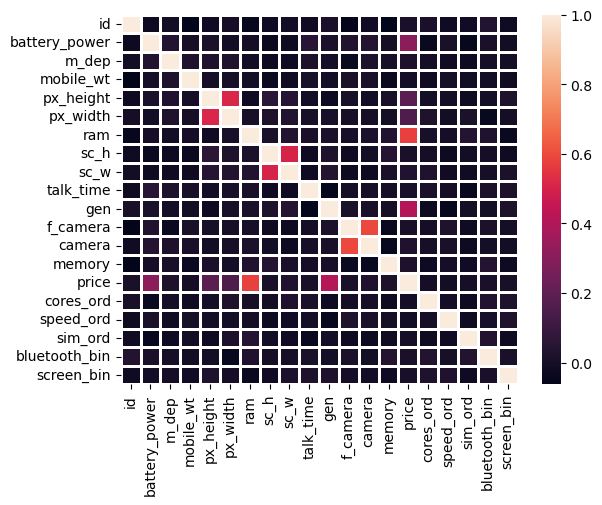

In [48]:
# 3. Plot a correlation heatmap of the modified data set and include it. 
correlation = data.corr()
sns.heatmap(correlation, xticklabels=correlation.columns.values, 
                yticklabels=correlation.columns.values, linewidths=1)

plt

In [49]:
# 4. Save the entire dataframe to a csv file named “mobile_prices_converted.csv” 
# and include it in  the submission. Make sure you don’t add a redundant index column. 
data.to_csv("mobile_prices_converted.csv", index=False)

In [51]:
# Task 3

<module 'matplotlib.pyplot' from 'C:\\Users\\osnat\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

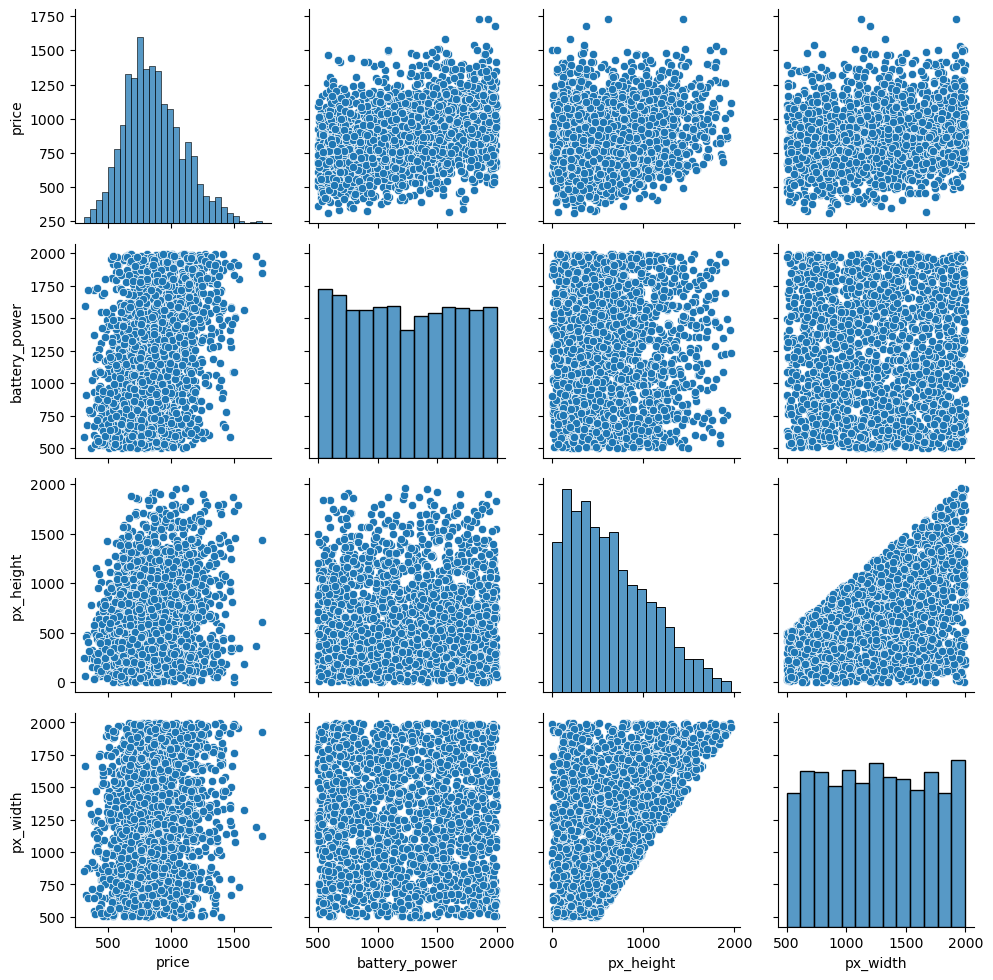

In [54]:
# 1. Choose 4 features and use a 2-d plot to show the relationships between each pair.
# This should  be done in the form of a 4x4 plot matrix as shown in class. 
pg = sns.PairGrid(data, vars=['price', 'battery_power', 'px_height', 'px_width'])
pg.map_diag(sns.histplot)
pg.map_offdiag(sns.scatterplot)

plt

<module 'matplotlib.pyplot' from 'C:\\Users\\osnat\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

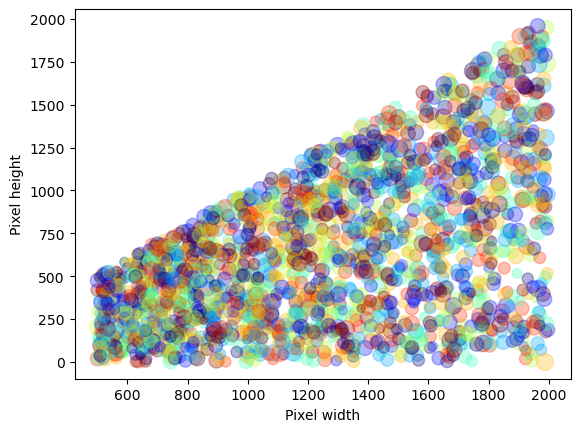

In [55]:
# 2. We have shown in class how to plot 4 dimensions of data in a 2-dimensional plot. 
# Use this method to plot the relationship between px_width, px_height, price and core.
# Px_width and px_height should be the X and Y coordinates respectively.
sorted_c = sorted(data.cores.unique())
c_cat = pd.Categorical(data['cores'], ordered=True, categories=sorted_c)
plt.figure()
plt.scatter(data['px_width'], data['px_height'], c=c_cat.codes, 
                s=data['price'] / 10., alpha=0.3, cmap='jet')
plt.xlabel('Pixel width')
plt.ylabel('Pixel height')

plt

In [1]:
# 3. There is an additional file named “mobile_prices_2.csv” distributed alongside the exercise. 
# This file contains a mapping of id to price. 
# This price is a transformation of the price in the original data set. 
# The transformation has been made based on a single feature from the data set. 
# Which feature was used and how do you know? Include any relevant plots and tables.
plt.close()
new_data = pd.read_csv("mobile_price_2.csv")
data["price_ratio"] = new_data["price_2"]/data["price"]
new_correlation = data.corr()
print(new_correlation["price_ratio"].min())

NameError: name 'plt' is not defined

<module 'matplotlib.pyplot' from 'C:\\Users\\osnat\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

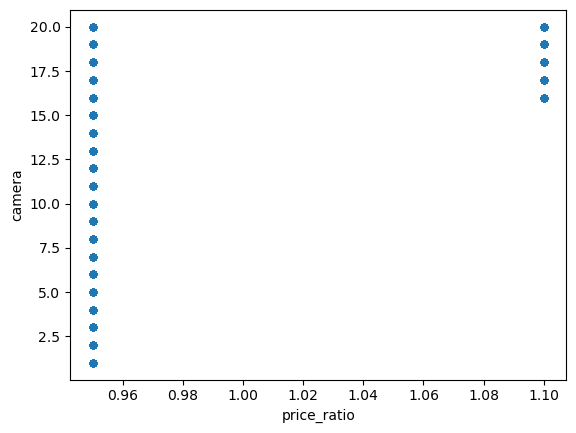

In [60]:
# The feature 'camera' is the bigger
data.plot.scatter(x="price_ratio", y="camera")
plt